In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus


C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r'C:\JupyterNotebook\DataSet\loan data.csv')
data.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [3]:
X = data.drop(columns=['customer.id','paid.back.loan'],axis=1)
y = data['paid.back.loan']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
fully_paid=y_train.value_counts()

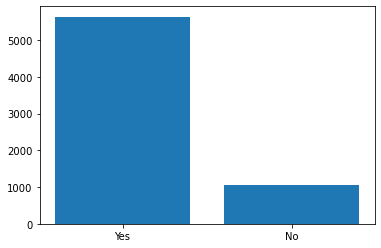

In [6]:
plt.bar(fully_paid.index, fully_paid)
plt.show()

In [7]:
X_train['int.rate'] = X_train['int.rate'].map(lambda x: str(x)[:-1])
X_train['int.rate'] = X_train['int.rate'].astype(float)/100

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
X_test['int.rate'] = X_test['int.rate'].map(lambda x: str(x)[:-1])
X_test['int.rate'] = X_test['int.rate'].astype(float)/100

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
num_df = X_train.select_dtypes(exclude = 'object')
cat_df = X_train.select_dtypes(include = 'object')

<Figure size 1440x1440 with 0 Axes>

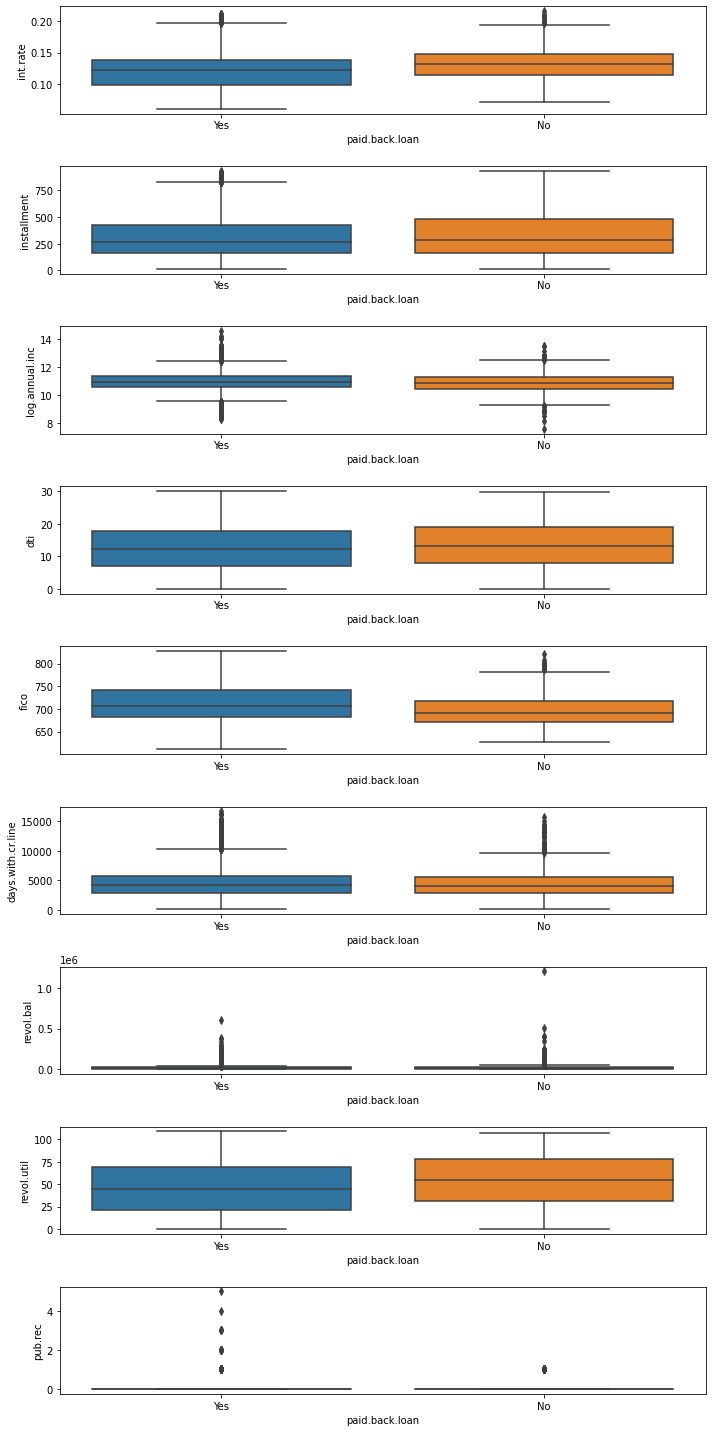

In [10]:
plt.figure(figsize=(20,20))
cols=list(num_df.columns)
fig,axes=plt.subplots(9,1, figsize=(10,20))
for i in range(9):          
    sns.boxplot(x=y_train,y=num_df[cols[i]],ax=axes[i])
    fig.tight_layout()    

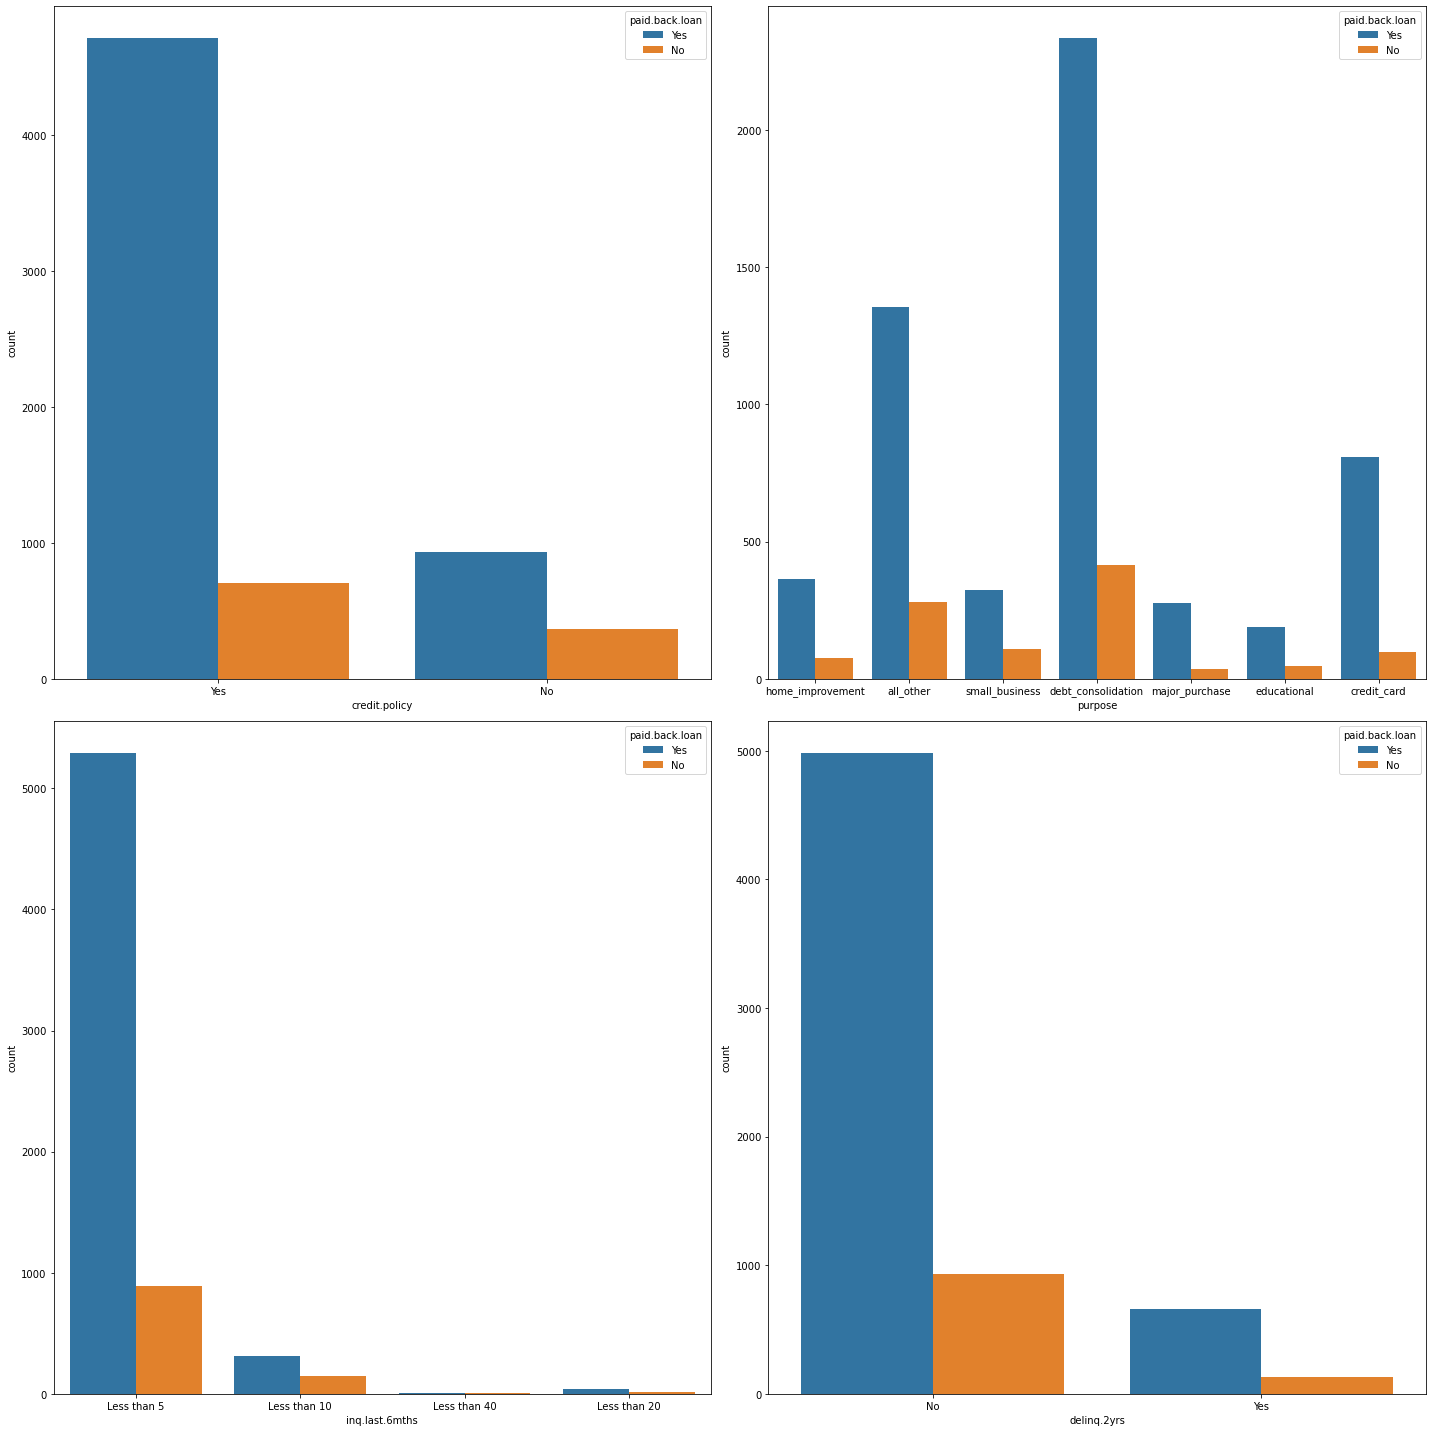

In [11]:
cols=list(cat_df.columns)
fig,axes=plt.subplots(2,2, figsize=(20,20))
for i in range(0,2):
    for j in range(0,2):
        sns.countplot(x=X_train[cols[i*2+j]], hue=y_train,ax=axes[i,j])                        
        fig.tight_layout()    

In [12]:
for col in cat_df.columns:
    
    #Filling null values with 'NA'
    X_train[col].fillna('NA',inplace=True)
    
    #Initalising a label encoder object
    le=LabelEncoder()
    
    #Fitting and transforming the column in X_train with 'le'
    X_train[col]=le.fit_transform(X_train[col]) 
    
    #Filling null values with 'NA'
    X_test[col].fillna('NA',inplace=True)
    
    #Fitting the column in X_test with 'le'
    X_test[col]=le.transform(X_test[col]) 

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [13]:
y_train.replace({'No':0,'Yes':1},inplace=True)
y_test.replace({'No':0,'Yes':1},inplace=True)

In [14]:
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
acc=model.score(X_test, y_test)
acc

0.7334725121781489

In [16]:
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

In [17]:
model_2 = DecisionTreeClassifier(random_state=0)
p_tree = GridSearchCV(estimator=model_2, param_grid=parameter_grid,cv=5)

In [18]:
p_tree.fit(X_train,y_train)
acc_2 = p_tree.score(X_test,y_test)
acc_2

0.837160751565762